In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales_df = pd.read_csv('retail_sales_dataset.csv')
sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
sales_by_category = sales_df.groupby('Product Category')['Total Amount'].sum().reset_index()
sales_by_category

,Product Category,Total Amount
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


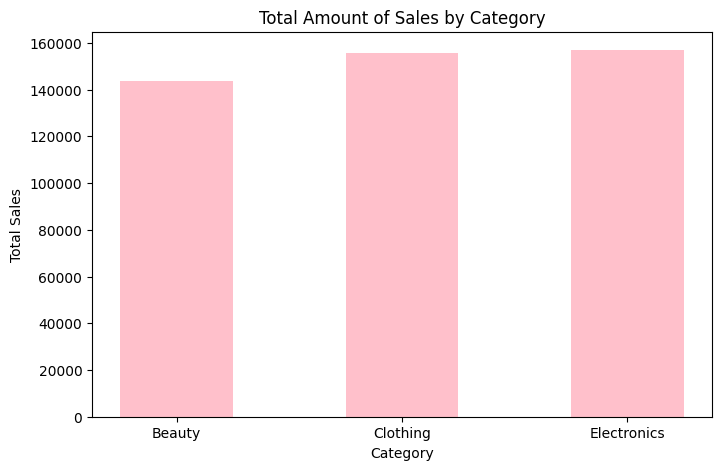

In [7]:
plt.figure(figsize=(8,5))
plt.bar(sales_by_category['Product Category'], sales_by_category['Total Amount'], width=0.5, 
        color='pink')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Amount of Sales by Category')
plt.show()

 Calculate the total sales for each product category by multiplying "Quantity Ordered" by "Price per Unit" and summing the results for each category. Visualize the total sales using a bar chart. What insights can you gather from the distribution of sales across different product categories?



Electronics take the lead in the total sales, followed closely by clothing and then beauty.

In [47]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Month'].replace({1: 'January', 2: 'February',  3:  'March', 4: 'April',  
                          5: 'May', 6:'June', 7:'July', 8: 'August', 9:'September', 
                           10: 'October', 11: 'November',  12: 'December'}, inplace =True)

sales_by_month = sales_df.groupby('Month')['Total Amount'].sum().reset_index()

sales_by_month =sales_by_month.reindex([4,3,7,0,8,6,5,1,11,10,9,2])
sales_by_month

,Month,Total Amount
4,January,36980
3,February,44060
7,March,28990
0,April,33870
8,May,53150
6,June,36715
5,July,35465
1,August,36960
11,September,23620
10,October,46580


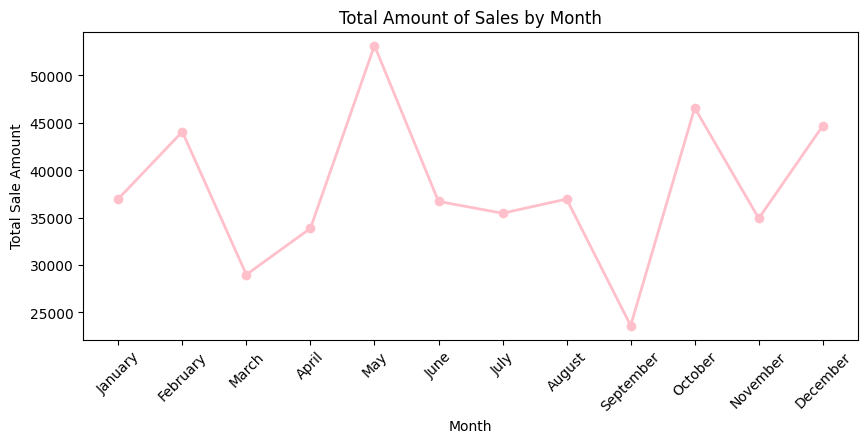

In [48]:
plt.figure(figsize=(10, 4))
plt.plot(sales_by_month['Month'], sales_by_month['Total Amount'], marker='o', 
         color='pink', linestyle='-', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Total Sale Amount')
plt.xticks(rotation=45)
plt.title('Total Amount of Sales by Month')
plt.show()

Analyze the data to find seasonal trends. Create a line graph showing the total sales per month. Describe any trends you see (e.g., sales peaks during certain months). What recommendations would you give to the store based on this trend? Do you think they were going on sale during these times? Or based on a holiday?\

Sales peak on the months May, October, December, and February.

- Mothers day, school year end shopping
- Halloween, fall discounts
- December, holidays, christmas
- Feb, Valentines

In [49]:
purchase_per_customer = sales_df.groupby('Customer ID')['Total Amount'].sum().reset_index()

low = 300
high = 600
def categorize(total):
    if total < low:
        return 'Low Spender'
    elif total < high:
        return 'Medium Spender'
    else:
        return 'High Spender'

purchase_per_customer['Spender Category'] = purchase_per_customer['Total Amount'].apply(categorize)


spender_counts = purchase_per_customer['Spender Category'].value_counts().to_frame('Count')
spender_counts

,Count
Spender Category,
Low Spender,604
High Spender,299
Medium Spender,97


Divide customers into three categories based on their total purchases: low, medium, and high spenders. Calculate the total purchase amount for each customer and define reasonable thresholds for the categories. What insights do you gain from this segmentation, and how could the store use these insights for marketing?


The threshold for low spenders is set at 300 and 600 for high spenders. The number of customers that fall under the low spender category is greatly larger than the rest. Low spenders comprise about 60% of the customers, as such it is important to cater to their interest. Keeping the prices of most items at the most reasonably low amount will allow them to keep the patronage of the low spenders. They may also use discounts and promos to attract these customers. Since high spenders follow in the ranks, it may be alright to keep some items expensive as there are still a considerable amount of customers willing to pay for them.

In [15]:
grade_df = pd.read_csv('StudentsPerformance_with_headers.csv')
grade_df.head()

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [16]:
grade_df['GRADE'].replace({7:4, 6:3.5, 5:3 , 4:2.5 , 3:2 , 2:1.5 , 1:1 , 0:0}, inplace = True)
grade_df.groupby('COURSE ID')['GRADE'].mean().reset_index().sort_values(by='GRADE', ascending=False).style.hide(axis="index")

COURSE ID,GRADE
7,3.666667
3,3.562500
6,3.437500
5,3.142857
4,2.750000
2,2.000000
1,1.621212
9,1.500000
8,1.142857


Calculate the average score for each student across the different courses. Then calculate the overall average score for each subject. Provide a summary of which subject students perform best in. How can the school use this information to improve subject-specific teaching strategies?

First, I converted the codes for the grades as noted by the owners of the dataset on Kaggle. The highest grade is 4.0 and the lowest 0. Based on this table of average grades per course, the students seem to be performing the best in Course 7 and doing most poorly in Course 8.

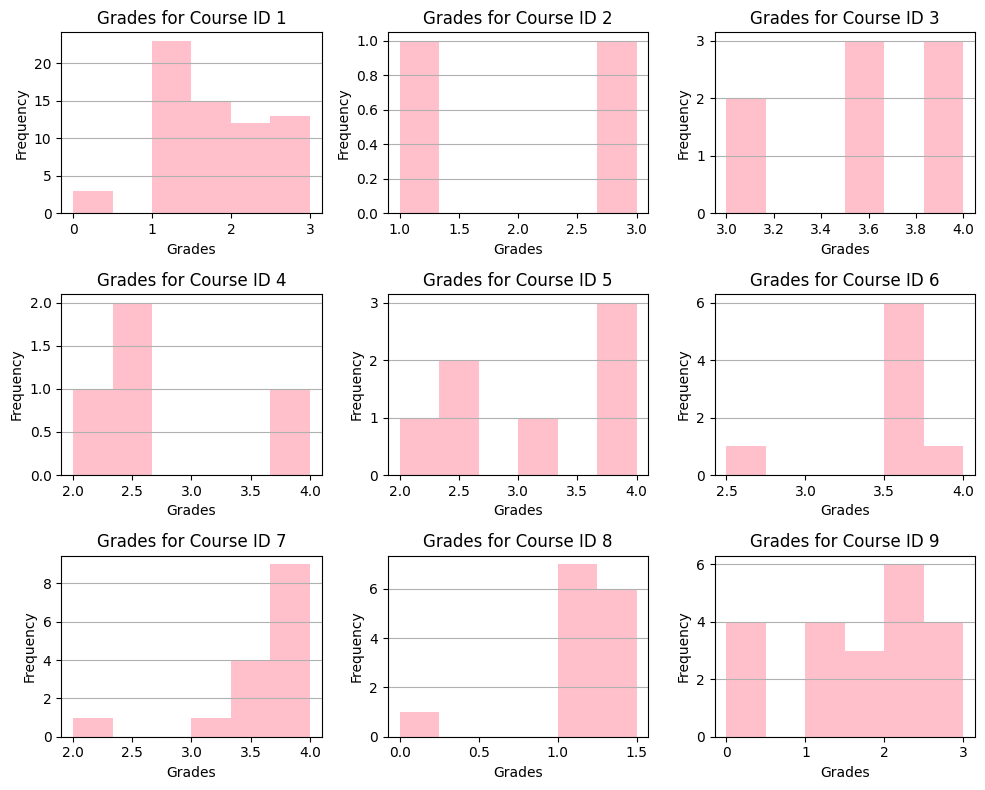

In [17]:
courses = grade_df['COURSE ID'].unique()
fig, axs = plt.subplots(3, 3, figsize=(10, 8))
axs = axs.flatten()  

for i, course in enumerate(courses):
    course_grades = grade_df[grade_df['COURSE ID'] == course]['GRADE']
    axs[i].hist(course_grades, bins=6, color='pink')
    axs[i].set_title(f'Grades for Course ID {course}')
    axs[i].set_xlabel('Grades')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(axis='y')

plt.tight_layout()  
plt.show()

Create a histogram for each course score to analyze the grades' distribution. Are most students performing well, or are the scores widely spread out? What does this tell you about the students' understanding of each subject?

It can be observed that the scores are widely spread out and more students generally seem to performing poorly. 88 out of 145 students obtined a grade of 2 and below. 

In [72]:
grade_counts = grade_df['GRADE'].value_counts().reset_index()
grade_counts.columns = ['GRADE', 'STUDENT COUNT']
count_per_grade = grade_counts.sort_values(by='GRADE')
students_failed = grade_df[grade_df['GRADE'] == 0][['STUDENT ID', 'GRADE']]

display(count_per_grade, students_failed)

,GRADE,STUDENT COUNT
7,0.0,8
0,1.0,35
1,1.5,24
2,2.0,21
6,2.5,10
3,3.0,17
5,3.5,13
4,4.0,17


,STUDENT ID,GRADE
9,STUDENT10,0.0
11,STUDENT12,0.0
12,STUDENT13,0.0
121,STUDENT122,0.0
128,STUDENT129,0.0
136,STUDENT137,0.0
138,STUDENT139,0.0
139,STUDENT140,0.0


Identify students who are consistently scoring below 50% in all three subjects. What percentage of students fall into this category, and what steps can the school take to support these students? 

8 out of 145 or about 5.52% of the students had scored 50% and thus earned a grade of 0 in their respective courses.

Can you formulate a prediction model based on the given data where a student can pass based on #29 and #32 data?

No, I can't :D

In [26]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report


grade_df['Cumulative grade point average in the last semester (/4.00)'].replace({
    7:4, 6:3.5, 5:3 , 4:2.5 , 3:2 , 2:1.5 , 1:1 , 0:0}, inplace = True)

X = grade_df[['Cumulative grade point average in the last semester (/4.00)', 
              'Expected Cumulative grade point average in the graduation (/4.00)']]
y = grade_df['GRADE']

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print(report)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)  # Initialize weights
    bias = 0  # Initialize bias
    
    for _ in range(epochs):

        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)
        
        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (y_predicted - y))
        db = (1 / m) * np.sum(y_predicted - y)
        
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
    return weights, bias

def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_predicted]

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Train the model
weights, bias = logistic_regression(X, y)

# Make predictions
y_pred = predict(X, weights, bias)

# Evaluate accuracy
acc = accuracy(y, y_pred)
print(f'Accuracy: {acc * 100:.2f}%')


Accuracy: 24.14%


In [61]:
def predict_probability(c_gpa, current_grade, weights, bias):
    X_new = np.column_stack((c_gpa, current_grade))

    linear_model = np.dot(X_new, weights) + bias
    
    probability = sigmoid(linear_model)
    
    return probability

# def logistic_regression(X, y, learning_rate=0.01, epochs=1000):
#     m, n = X.shape
#     weights = np.zeros(n) 
#     bias = 0
    
#     for _ in range(epochs):
#         linear_model = np.dot(X, weights) + bias
#         y_predicted = sigmoid(linear_model)
        
#         dw = (1 / m) * np.dot(X.T, (y_predicted - y))
#         db = (1 / m) * np.sum(y_predicted - y)
     
#         weights -= learning_rate * dw
#         bias -= learning_rate * db
        
#     return weights, bias

# weights, bias = logistic_regression(X, y)

weights = np.array([0.5, 0.3])  
bias = -1.0
c_gpa = grade_df['Cumulative grade point average in the last semester (/4.00)']
current_grade = grade_df['GRADE']

probability_of_passing = predict_probability(c_gpa, current_grade, weights, bias)
grade_df['Probability of Passing'] = predict_probability(c_gpa, current_grade, weights, bias)

result = grade_df[['STUDENT ID','Cumulative grade point average in the last semester (/4.00)','GRADE', 'Probability of Passing']]

average_probability = grade_df.groupby('GRADE')['Probability of Passing'].mean().reset_index()


average_probability.rename(columns={'Probability of Passing': 'Average Probability of Passing'}, inplace=True)
# average_probability

# grade_df

display(average_probability,result)



,GRADE,Average Probability of Passing
0,0.0,0.438770
1,1.0,0.529701
2,1.5,0.583828
3,2.0,0.602452
4,2.5,0.644179
5,3.0,0.705246
6,3.5,0.700427
7,4.0,0.746259


,STUDENT ID,Cumulative grade point average in the last semester (/4.00),GRADE,Probability of Passing
0,STUDENT1,1.0,1.0,0.450166
1,STUDENT2,1.5,1.0,0.512497
2,STUDENT3,1.5,1.0,0.512497
3,STUDENT4,1.5,1.0,0.512497
4,STUDENT5,1.5,1.0,0.512497
...,...,...,...,...
140,STUDENT141,1.5,3.0,0.657010
141,STUDENT142,1.5,3.0,0.657010
142,STUDENT143,2.5,1.0,0.634136
143,STUDENT144,1.5,2.5,0.622459
